# SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """

In [14]:
import sys
import numpy as np
from windy_gridworld import WindyGridworldEnv
from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 2000)


class Sarsa:
    def __init__(self):
        self.env = WindyGridworldEnv()
        self.nA = self.env.action_space.n
        self.nB = self.env.observation_space.n
        self.epsilon = 0.1
        self.gamma = 1.0
        self.alpha = 0.1
        self.Q = np.zeros([70, self.nA])
        self.lbd = 0.5
        self.E = np.zeros([70, self.nA])
        pass

    @staticmethod
    def get_direction(a):
        if a == 0: return 'up'
        elif a == 1: return 'right'
        elif a == 2: return 'down'
        elif a == 3: return 'left'
        else: sys.exit(250)
        pass

    def get_epision_greedy_action_policy(self, q, observation):
        A = np.ones(self.nA, dtype=float) * self.epsilon / self.nA
        best_action = np.argmax(q[observation])
        A[best_action] += (1.0 - self.epsilon)  # update non-optimum action probability for exploration
        a = np.random.choice(np.arange(self.nA), p=A)
        return a, self.get_direction(a)
    
    def sarsa(self, total_episodes):
        i = 0
        for k in range(total_episodes):
            current_state = self.env.reset()
            current_action, comment = self.get_epision_greedy_action_policy(self.Q, current_state)
            while True:
                next_state, reward, done, _ = self.env.step(current_action)
                next_action, comment = self.get_epision_greedy_action_policy(self.Q, next_state)
                td_target = reward + self.gamma * self.Q[next_state][next_action]
                td_error = td_target - self.Q[current_state][current_action]
                self.Q[current_state][current_action] += self.alpha * td_error
                if done: 
                    break
#                 pic = self.visualization()
#                 pic.get_figure().savefig(i++ + '.jpg',dpi=300,bbox_inches='tight')
                current_state = next_state
                current_action = next_action
        return self.Q
    
    def sarsa_lambda(self, total_episodes):
        i = 0
        for k in range(total_episodes):
            current_state = self.env.reset()
            current_action, comment = self.get_epision_greedy_action_policy(self.Q, current_state)
            while True:
                next_state, reward, done, _ = self.env.step(current_action)
                next_action, comment = self.get_epision_greedy_action_policy(self.Q, next_state)
                td_target = reward + self.gamma * self.Q[next_state][next_action]
                td_error = td_target - self.Q[current_state][current_action]
                # E(S,A) += 1
                self.E[current_state][current_action] += 1
                # update Q(S,A) with E(S,A)
                for s in range(70):
                    self.Q[s][:] += self.alpha * td_error * self.E[s][:]
                    self.E[s][:] *= self.gamma * self.lbd
                if done: 
                    break
#                 pic = self.visualization()
#                 pic.get_figure().savefig(i++ + '.jpg',dpi=300,bbox_inches='tight')
                current_state = next_state
                current_action = next_action
        return self.Q
    
    def visualization(self):
        gridworld = np.zeros([7, 10])
        for x in range(7):
            for y in range(10):
                state = x * 10 + y
                gridworld[x][y] = np.argmax(self.Q[state])
        fix, ax = plt.subplots(figsize=(8, 4))
        sns.heatmap(gridworld, annot=True, ax=ax)
        pass

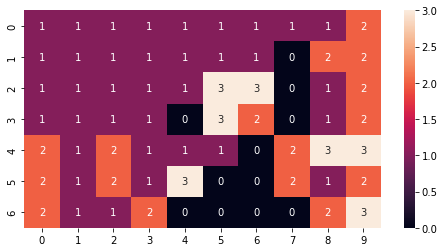

In [18]:
foo = Sarsa()
foo.sarsa_lambda(1000)
foo.visualization()

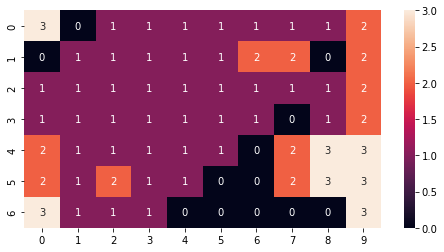

In [48]:
foo = Sarsa()
foo.sarsa(1000)
foo.visualization()

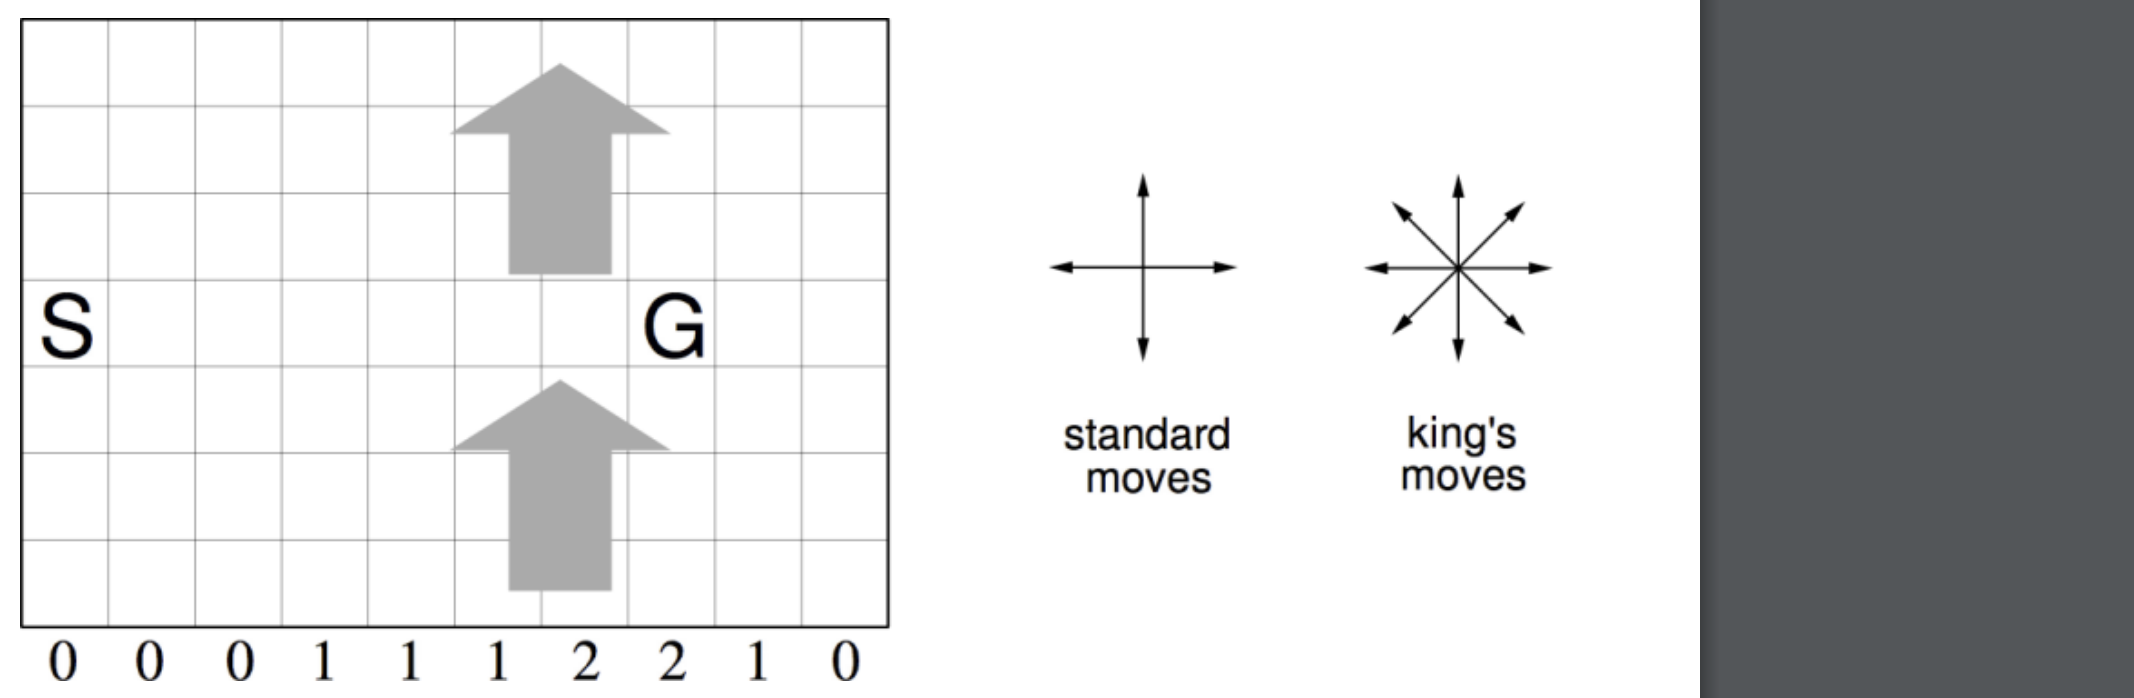

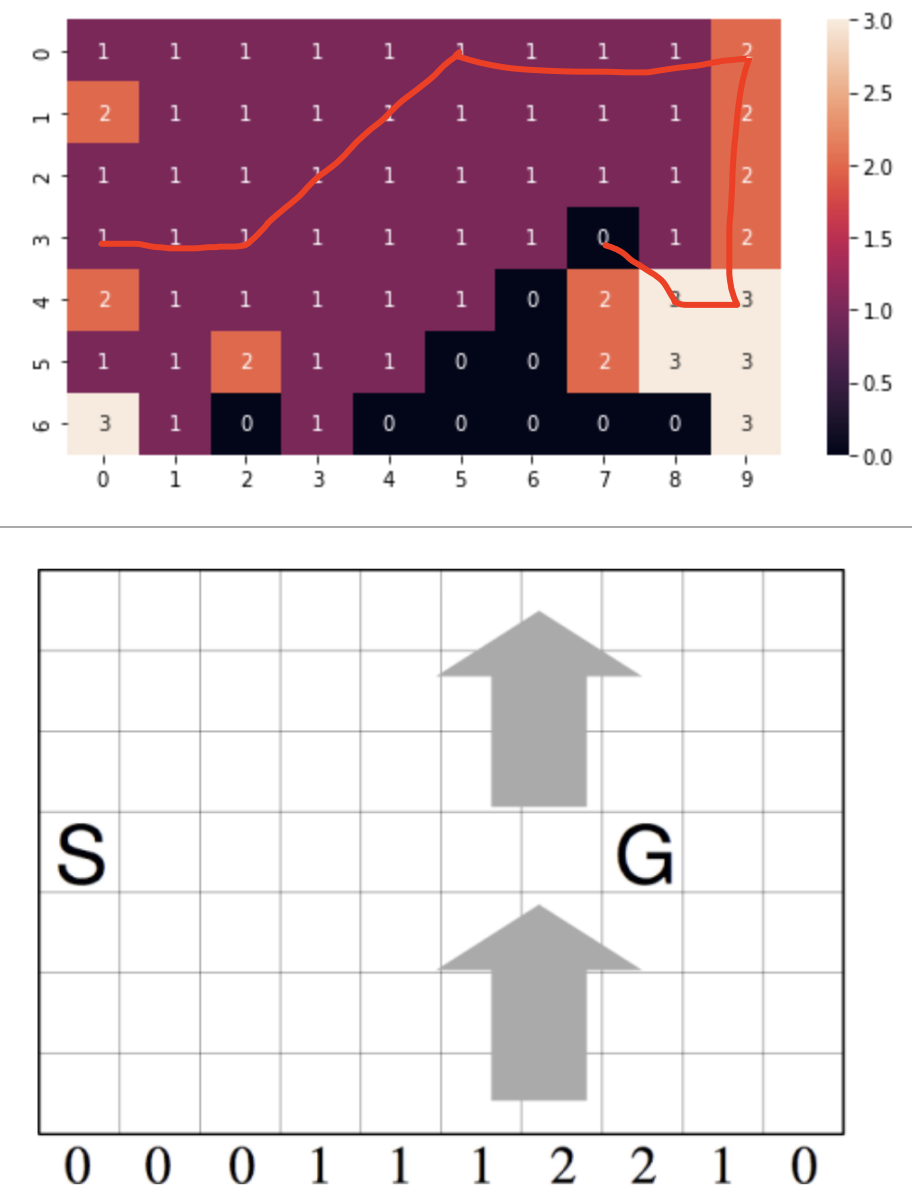

In [1]:
pip install --upgrade gym==0.19.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv

/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# This is a standard grid-world, with start and goal states, but with one diﬀerence: there is a crosswind upward through the middle of the grid. The actions are the standard four — up, down,right, and left — but in the middle region the resultant next states are shifted upward by a “wind,” the strength of which varies from column to column. The strength of the wind is given below each column, in number of cells shifted upward. For example, if you are one cell to the right of the goal, then the action left takes you to the cell just above the goal. Let us treat this as an undiscounted episodic task, with constant rewards of −1 until the goal state is reached.

In [3]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
env = WindyGridworldEnv()
nA = env.action_space.n
nB=env.observation_space.n
epsilon = 0.1
gamma = 1.0
alpha=0.1

In [5]:
nA


4

In [6]:
nB

70

In [7]:
def get_epision_greedy_action_policy(Q,observation):
    
    A = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[observation])
    A[best_action] += (1.0 - epsilon)
    
    return A

With the help of choice() method, we can get the random samples of one dimensional array and return the random samples of numpy array.

Syntax : numpy.random.choice(a, size=None, replace=True, p=None)

Parameters:

1) a – 1-D array of numpy having random samples.

2) size – Output shape of random samples of numpy array.

3) replace – Whether the sample is with or without replacement.

4) p – The probability attach with every samples in a. 



In [8]:
def sarsa(total_episodes):
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for k in range(total_episodes):
        
        current_state = env.reset()
        # The policy we're following
        prob_scores = get_epision_greedy_action_policy(Q,current_state)
        
        # sample action following epsilon greedy policy
        current_action = np.random.choice(np.arange(nA), p=prob_scores)
        
        while True:
            # Perform the action -> Get the reward and observe the next state 
            next_state, reward, done, _ = env.step(current_action)
            
            prob_scores_next_state = get_epision_greedy_action_policy(Q,next_state)
            
             # Choose the action for the next state following our current policy
            next_action = np.random.choice(np.arange(nA), p=prob_scores_next_state)
            
            # value that we should have got
            td_target = reward + gamma * Q[next_state][next_action]
            td_error = td_target - Q[current_state][current_action]
            
              # SARSA update
            Q[current_state][current_action] = Q[current_state][current_action] + alpha * td_error
    
            if done:
                break
            
            # Update current state
            current_state = next_state        
            current_action = next_action
    return Q

In [9]:
Q = sarsa(100)

In [10]:
#here is the output, the output array contains the values for every action for every state
#A function that takes the observation as an argument and returns
        #the probabilities for each action in the form of a numpy array of length nA.
Q

defaultdict(<function __main__.sarsa.<locals>.<lambda>()>,
            {30: array([-6.75401247, -6.78742844, -6.75019453, -6.81744196]),
             20: array([-6.7809436 , -6.85898634, -6.9086617 , -6.82613059]),
             10: array([-7.12134067, -7.13215829, -7.09406044, -7.14991985]),
             0: array([-7.3038953 , -7.32470529, -7.33660381, -7.43619872]),
             1: array([-7.62789114, -7.46781519, -7.48177625, -7.51054042]),
             2: array([-7.97244473, -8.05094442, -7.94570944, -7.97040108]),
             3: array([-8.79549931, -8.67952682, -8.75987202, -8.69807946]),
             4: array([-9.37112112, -9.3591142 , -9.41700194, -9.28285999]),
             5: array([-9.66606922, -9.55700714, -9.70604094, -9.52241143]),
             6: array([-8.91698992, -8.91934504, -8.93013954, -8.93753404]),
             12: array([-7.30509947, -7.23446257, -7.24846408, -7.30925649]),
             11: array([-7.15895962, -7.13107421, -7.15985162, -7.16684391]),
            